In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, invgamma, invwishart, wishart
import pickle
import sys

# Sample from a Gaussian mixture model and from a multivariate normal
A Gaussian mixture model (GMM) is a blend of 2 Gaussians at 2 different means with different standard deviations. The probability density of a GMM with 2 components is
$$
p(x|\mu_1,\mu_2,\sigma_1, \sigma_2,\pi_1,\pi_2)=\pi_1 \mathcal N(x|\mu_1, \sigma_1)+\pi_2 \mathcal N(x|\mu_2, \sigma_2)
$$
$\pi_1,\pi_2$ are the mixing weights, denoting how much weight we give each component.

$\mu_1,\mu_2$ are the means: a list of 2 vectors

$\sigma_1, \sigma_2$ are the covariances: a list of 2 matrices

We can sample from a GMM by:
1) Sampling from a multinomial distribution: This gives us a list of which component to sample from 

2) Given the list of components to sample from, sample from the corresponding multivariate normal (with the given mean and covariance)


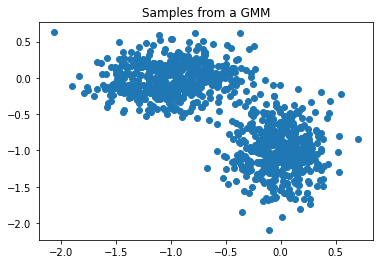

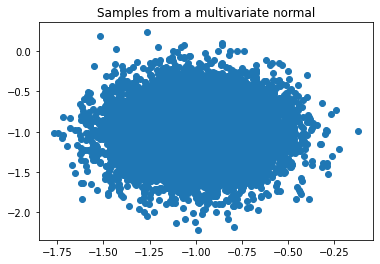

In [3]:
def sample_gmm(means, covars, 
               n_samples = 1000, 
               weights = [0.5,0.5]):
    rng = np.random.mtrand._rand
    n_samples_comp = rng.multinomial(n_samples, weights)
    dat = np.vstack([
                rng.multivariate_normal(mean, covariance, int(sample))
                for (mean, covariance, sample) in zip(
                    means, covars, n_samples_comp)])
    return dat
    
def sample_mvn(mean, cov, n_samples = 10000):
    rng = np.random.mtrand._rand
    dat = rng.multivariate_normal(mean, cov, n_samples)
    return dat
    
means = np.array([[0,-1], [-1,0]])
cov1 = np.diag([1,2])/20
cov2 = np.diag([2,1])/20
#precisions = [np.linalg.inv(cov1), np.linalg.inv(cov2)]
covars = [cov1, cov2]
dat = sample_gmm(means, covars)
plt.scatter(dat[:,0],dat[:,1])
plt.title("Samples from a GMM")
plt.show()
dat = sample_mvn([-1, -1], cov1)
plt.scatter(dat[:,0],dat[:,1])
plt.title("Samples from a multivariate normal")
plt.show()

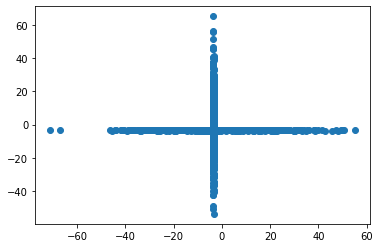

In [8]:
means = np.array([[-3.5,0], [0,-3.5]])
sd1 = 0.1
sd2 = 19
cov1 = np.diag([sd1**2,sd2**2])
cov2 = np.diag([sd2**2,sd1**2])
covars = [cov1, cov2]
dat = sample_gmm(means, covars,n_samples=1000)
plt.scatter(dat[:,0],dat[:,1])
plt.show()


Given a dataset $X=\{x_1,x_2,\ldots, x_N\}$, the log-probability of the dataset under the GMM is
$$
\begin{aligned}&
p(X|\mu_1,\mu_2,\sigma_1, \sigma_2,\pi_1,\pi_2)=\prod _{i=1}^N \pi_1 \mathcal N(x_i|\mu_1, \sigma_1)+\pi_2 \mathcal N(x_i|\mu_2, \sigma_2)\\
& \Rightarrow \log p(X|\mu_1,\mu_2,\sigma_1, \sigma_2,\pi_1,\pi_2)\\
& \mkern50mu = \sum  _{i=1}^N \log \left (  \pi_1 \mathcal N(x_i|\mu_1, \sigma_1)+\pi_2 \mathcal N(x_i|\mu_2, \sigma_2)\right ) 
\end{aligned} 
$$

The log-probability of the dataset $X=\{x_1,x_2,\ldots, x_N\}$ under the multivariate normal is
\begin{aligned}&
p(X|\mu , \sigma )=\prod _{i=1}^N   \mathcal N(x_i|\mu , \sigma) \\
& \Rightarrow \log p(X|\mu , \sigma )  = \sum  _{i=1}^N \log  \mathcal N(x_i|\mu , \sigma)
\end{aligned} 

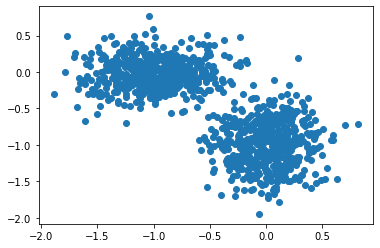

The likelihood of this dataset (in figure) under a mixture model is -892.8186174075544
The likelihood of this dataset (in figure) under a multivariate normal model is -7867.9724624897435


In [3]:
def compute_logdensity_gmm(dat, means, covars,  
               weights = [0.5,0.5]):
    comp0 = multivariate_normal(means[0], covars[0])
    comp1 = multivariate_normal(means[1], covars[1])
    llh = 0.0
    for x in (dat):
        w = [weights[idx] * (comp.pdf(x))
                 for idx, comp in enumerate([comp0, comp1])]
        sum_ = np.sum(w)
        l = np.log(sum_)
        llh += l
    return llh

def compute_logdensity_mvn(dat, mean, covar):
    comp0 = multivariate_normal(mean, covar)
    llh = np.sum(np.log(comp0.pdf(dat)))
    return (llh)
means = np.array([[0,-1], [-1,0]])
cov1 = np.diag([1,2])/20
cov2 = np.diag([2,1])/20
covars = [cov1, cov2]
dat = sample_gmm(means, covars)
plt.scatter(dat[:,0],dat[:,1])
plt.show()
log_llh = compute_logdensity_gmm(dat, means, covars,  
               weights = [0.5,0.5])
print("The likelihood of this dataset (in figure) under a mixture model is", log_llh)
log_llh = compute_logdensity_mvn(dat, [-1, -1], cov1)
print("The likelihood of this dataset (in figure) under a multivariate normal model is", log_llh)


We see that the mixture dataset is much more likely under the mixture model than the multivariate normal model.

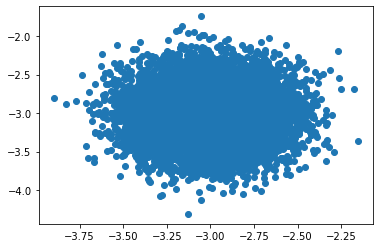

The likelihood of this dataset (in figure) under a mixture model is -1049225.991776101
The likelihood of this dataset (in figure) under a multivariate normal model is -602649.9138474719


In [4]:
dat = sample_mvn([-3, -3], cov1)
plt.scatter(dat[:,0],dat[:,1])
plt.show()
log_llh = compute_logdensity_gmm(dat, means, covars,  
               weights = [0.5,0.5])
print("The likelihood of this dataset (in figure) under a mixture model is", log_llh)
log_llh = compute_logdensity_mvn(dat, [-1, -1], cov1)
print("The likelihood of this dataset (in figure) under a multivariate normal model is", log_llh)


We see that the multivariate normal dataset is much more likely under the multivariate normal model than the mixture model.

$$ p(x) = \int p(x|\theta) p(\theta) d\theta $$

$$ p(x) = \mathbb E _{f(\theta)}  \left [ \frac { p(x|\theta) p(\theta)} { f(\theta)}  \right ] $$

If $f(\theta)=p(\theta)$ is the prior distribution, then the marginal likelihood is simply $$ p(x) = \mathbb E _{f(\theta)}  \left [ p(x|\theta)  \right ] $$

From Gelman (Bayesian data analysis): Recall that the conjugate distribution for the univariate normal with unknown mean and variance is the normal-inverse- $\chi^{2}$ distribution (3.6). We can use the inverse-Wishart distribution, a multivariate generalization of the scaled inverse- $\chi^{2}$, to describe the prior distribution of the matrix $\Sigma$. The conjugate prior distribution for $(\mu, \Sigma)$, the normal-inverseWishart, is conveniently parameterized in terms of hyperparameters $\left(\mu_{0}, \Lambda_{0} / \kappa_{0} ; \nu_{0}, \Lambda_{0}\right)$
$$
\begin{aligned}
\Sigma & \sim \text { Inv-Wishart }_{\nu_{0}}\left(\Lambda_{0}^{-1}\right) \\
\mu \mid \Sigma & \sim \mathrm{N}\left(\mu_{0}, \Sigma / \kappa_{0}\right)
\end{aligned}
$$
which corresponds to the joint prior density
$$
p(\mu, \Sigma) \propto|\Sigma|^{-\left(\left(\nu_{0}+d\right) / 2+1\right)} \exp \left(-\frac{1}{2} \operatorname{tr}\left(\Lambda_{0} \Sigma^{-1}\right)-\frac{\kappa_{0}}{2}\left(\mu-\mu_{0}\right)^{T} \Sigma^{-1}\left(\mu-\mu_{0}\right)\right)
$$

In [5]:
def prior_mvn_samples(nu_0, inv_lambda_0, mu_0, kappa_0, size=10):
    sigma_sample = invwishart.rvs(df=nu_0, scale = inv_lambda_0, size=size)
    mu_sample = [multivariate_normal.rvs(mean = mu_0, cov = sigma_sample[idx] / kappa_0) for idx in range(size)]
    return mu_sample, sigma_sample

def prior_gmm_samples(nu_s, inv_lambda_s, mu_s, kappa_s, size=10):
    nu_0, nu_1 = nu_s
    inv_lambda_0, inv_lambda_1 = inv_lambda_s
    mu_0, mu_1 = mu_s
    kappa_0, kappa_1 = kappa_s
    mu_sample0, sigma_sample0 = prior_mvn_samples(nu_0, inv_lambda_0, mu_0, kappa_0, size=size)
    mu_sample1, sigma_sample1 = prior_mvn_samples(nu_1, inv_lambda_1, mu_1, kappa_1, size=size)
    


In [6]:
def post_mvn(dat, nu_0, inv_lambda_0, mu_0, kappa_0):
    n = dat.shape[0]
    mu_0 = np.array(mu_0)
    y_mean = np.mean(dat, axis=0)
    mu_post = kappa_0/(kappa_0 + n) * mu_0 + n /(kappa_0 + n) * y_mean
    kappa_post = kappa_0 + n
    nu_post = nu_0 + n
    lambda_0 = np.linalg.inv(inv_lambda_0)
    lambda_post = lambda_0 + (dat - np.mean(dat, axis=0)).T.dot((dat - np.mean(dat, axis=0))) \
                + (kappa_0 * n)/(kappa_0 + n) * (np.mean(dat, axis=0) - mu_0).T.dot((np.mean(dat, axis=0) - mu_0))
    #inv_lambda_post = np.linalg.inv(lambda_post)
    print(lambda_0)
    print("(kappa_0 * n)/(kappa_0 + n)", (kappa_0 * n)/(kappa_0 + n))
    print((dat - np.mean(dat, axis=0)).T.dot((dat - np.mean(dat, axis=0))))
    print((kappa_0 * n)/(kappa_0 + n) * (np.mean(dat, axis=0) - mu_0).T.dot((np.mean(dat, axis=0) - mu_0)))
    print(mu_post, kappa_post, nu_post, lambda_post)
    return mu_post, kappa_post, nu_post, lambda_post

def logsumexp(x):
    c = x.max()
    return c + np.log(np.sum(np.exp(x - c)))

def marginal_likelihood_mvn(dat, nu_0, inv_lambda_0, mu_0, kappa_0, size=1000):
    mu_sample0, sigma_sample0 = prior_mvn_samples(nu_0, inv_lambda_0, mu_0, kappa_0, size=size)
    mls = []
    for i in range(size):
        mean = mu_sample0[i]
        covar = sigma_sample0[i]
        ml = compute_logdensity_mvn(dat, mean, covar)
        mls.append(ml)
    mls = np.array(mls)
   
    return mls, np.exp(mls - logsumexp(mls))




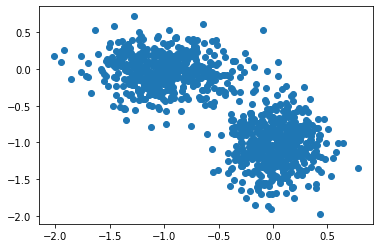

[[1. 0.]
 [0. 1.]]
(kappa_0 * n)/(kappa_0 + n) 9.900990099009901
[[ 339.70345117 -261.38945813]
 [-261.38945813  332.01447882]]
132.82539484112627
[-0.52292261 -0.54858837] 1010 1005 [[ 473.52884601 -128.56406329]
 [-128.56406329  465.83987366]]


-1862.279925325105

In [7]:
def marginal_likelihood_mvn_analytic(dat, nu_0, inv_lambda_0, mu_0, kappa_0):
    mu_post, kappa_post, nu_post, lambda_post = post_mvn(dat, nu_0, inv_lambda_0, mu_0, kappa_0)
    samp_cov = invwishart.rvs(df=nu_post, scale=lambda_post)
    samp_mean = multivariate_normal.rvs(mean = mu_post, cov = samp_cov / kappa_post)

    log_prior = invwishart.logpdf(samp_cov, df=nu_0, scale=inv_lambda_0) \
            + multivariate_normal.logpdf(samp_mean,mean=mu_0,cov = samp_cov / kappa_0)
    log_llh = compute_logdensity_mvn(dat, samp_mean, samp_cov)
    log_post = invwishart.logpdf(samp_cov, df=nu_post, scale=lambda_post) \
            + multivariate_normal.logpdf(samp_mean,mean=mu_post,cov = samp_cov / kappa_post)
    #print(np.linalg.inv(lambda_post))
    #print("log_prior", log_prior)
    #print("log_llh",log_llh)
    #print("log_post",log_post)
    return log_prior + log_llh - log_post
    
    
means = np.array([[0,-1], [-1,0]])
cov1 = np.diag([1,2])/20
cov2 = np.diag([2,1])/20
covars = [cov1, cov2]
dat = sample_gmm(means, covars)
plt.scatter(dat[:,0],dat[:,1])
plt.show()
marginal_likelihood_mvn_analytic(dat, 5, np.eye(2), [-3.1, -3.1], 10)

In [361]:
def metropolis_T_mvn(x, f, lamda, prior_hyperparams, scale = 1, n_steps=1):
    """
    Transition distribution: T(x'|x) using n-steps Metropolis sampler
    """
    if isinstance(scale, tuple):
        assert len(scale) == len(x)
        mu_scale, sig_df = scale
    nu_0, inv_lambda_0, mu_0, kappa_0 = prior_hyperparams
    for t in range(n_steps):
        # Proposal
        mu, sigma = x
        mu_prime = mu + mu_scale * np.random.randn() 
        sig_prime = invwishart.rvs(df=sig_df, scale=sig_df * sigma)
        
        # Compute logq (log transition prob) because the sigma proposal distribution is not symmetric
        # The mu proposal distribution is symmetric (normal distribution)
        logq_prime_cur = invwishart.logpdf(sig_prime, df=sig_df, scale=sig_df * sigma)
        logq_cur_prime = invwishart.logpdf(sigma, df=sig_df, scale=sig_df * sig_prime)
        
        # Compute log prior
        logprior_prime = invwishart.logpdf(sig_prime, df=nu_0, scale=inv_lambda_0) \
                        + multivariate_normal.logpdf(mu_prime, mean = mu_0, cov = sig_prime/kappa_0)
        logprior_cur = invwishart.logpdf(sigma, df=nu_0, scale=inv_lambda_0) \
                        + multivariate_normal.logpdf(mu, mean = mu_0, cov = sigma/kappa_0)
        
        # Acceptance prob
        log_a = logprior_prime + lamda * f((mu_prime, sig_prime)) \
                    + logq_cur_prime \
                - logprior_cur - lamda * f((mu, sigma)) - logq_prime_cur

        if np.log(np.random.rand()) < log_a:
            x = (mu_prime, sig_prime)
        #print("log_a, x", log_a, x)
        

    return x

def metropolis_ais_mvn(dat, nu_0, inv_lambda_0, mu_0, kappa_0, size=100, n_inter=1000, T = metropolis_T_mvn):
    mu_sample0, sigma_sample0 = prior_mvn_samples(nu_0, inv_lambda_0, mu_0, kappa_0, size=size)
    mu_sample0, sigma_sample0 = (np.array(mu_sample0), np.array(sigma_sample0))
    w = np.zeros(mu_sample0.shape[0])
    lambdas = np.linspace(0, 1, n_inter)
    diff = lambdas[1] - lambdas[0] 
    print(invwishart.rvs(df=nu_0, scale = inv_lambda_0, size=1))
    
    for idx, mu_samp, sig_samp in zip(range(size), mu_sample0, sigma_sample0):
        #print("sig_samp", sig_samp)
        for idlam, lamda in zip(range(n_inter), lambdas):
            #print(idlam, lamda)
            #print(idx, mu_samp)
            #_ = invwishart.rvs(df=20, scale=20*sig_samp)
            
            mu_samp, sig_samp = T((mu_samp, sig_samp), 
                                        lambda x:  compute_logdensity_mvn(dat, *x), lamda,
                                       scale = (1/5, 20),
                                       prior_hyperparams = (nu_0, inv_lambda_0, mu_0, kappa_0), 
                                 n_steps = 1)
            _llh = compute_logdensity_mvn(dat, mu_samp, sig_samp)
            w[idx] += diff * _llh
        print("w", w[idx], _llh, "sig_samp", sig_samp)
    return w
        
        
w = metropolis_ais_mvn(dat, 5, np.eye(2), [-3.1, -3.1], 10, size=100)

[[ 0.47221771 -0.1871023 ]
 [-0.1871023   0.23286386]]
w -1938.0207235964988 -1468.6934974143733 sig_samp [[ 0.48269736 -0.22163796]
 [-0.22163796  0.39033149]]
w -1985.6740214882932 -1471.993999184153 sig_samp [[ 0.42587948 -0.21854453]
 [-0.21854453  0.44489899]]
w -2163.0978973074284 -1490.5051578253067 sig_samp [[ 0.43362981 -0.1753159 ]
 [-0.1753159   0.39001476]]
w -2181.8461361340887 -1423.6355893545158 sig_samp [[ 0.40659224 -0.1889826 ]
 [-0.1889826   0.35442911]]
w -2263.3606749192977 -1493.4559713628682 sig_samp [[ 0.44420775 -0.18119147]
 [-0.18119147  0.39945459]]
w -2007.3425483590029 -1501.7376238125057 sig_samp [[ 0.37187955 -0.15888458]
 [-0.15888458  0.41910299]]
w -1930.7968677979563 -1521.5918632931796 sig_samp [[ 0.34828707 -0.13517038]
 [-0.13517038  0.41601413]]
w -2134.1400901383263 -1517.9743600988913 sig_samp [[ 0.38273575 -0.12379539]
 [-0.12379539  0.37597156]]
w -1944.1899855850731 -1501.6936366594796 sig_samp [[ 0.4232679  -0.20175617]
 [-0.20175617  0.425

w -1931.7068409530543 -1495.5119641907872 sig_samp [[ 0.45378753 -0.24205672]
 [-0.24205672  0.48876127]]
w -2139.2925252998684 -1556.6351957762386 sig_samp [[ 0.43414124 -0.17978517]
 [-0.17978517  0.43870229]]
w -1996.5838083051065 -1534.43175802909 sig_samp [[ 0.43044738 -0.23345192]
 [-0.23345192  0.50015759]]
w -2814.9483605644086 -1507.0663889348739 sig_samp [[ 0.36798971 -0.1685486 ]
 [-0.1685486   0.40850295]]
w -2127.798836725409 -1490.8684410754881 sig_samp [[ 0.42777853 -0.15861376]
 [-0.15861376  0.33422598]]
w -2410.867692063448 -1620.4017800854929 sig_samp [[ 0.44528923 -0.17683102]
 [-0.17683102  0.46067092]]
w -2015.776371154333 -1619.624389971879 sig_samp [[ 0.42887546 -0.17704251]
 [-0.17704251  0.42874041]]
w -2087.7090667439315 -1487.071618002922 sig_samp [[ 0.4434655  -0.19400045]
 [-0.19400045  0.40146334]]
w -2302.594123940079 -1613.928080107542 sig_samp [[ 0.57019733 -0.2844162 ]
 [-0.2844162   0.45328483]]
w -2002.4696115951006 -1502.3326446963686 sig_samp [[ 0

In [362]:
np.sort(w)

array([-2814.94836056, -2720.60213537, -2610.62178755, -2566.90304549,
       -2475.57624552, -2439.64742226, -2424.85875449, -2410.86769206,
       -2409.08574375, -2401.62757485, -2390.44547076, -2387.08849185,
       -2365.3795796 , -2322.3960765 , -2307.60250698, -2302.59412394,
       -2292.70589744, -2279.04494669, -2277.72178312, -2263.36067492,
       -2247.70810253, -2237.80739188, -2221.65034721, -2217.77786734,
       -2201.89867201, -2196.67336107, -2194.10360777, -2187.53052128,
       -2186.74560783, -2181.84613613, -2171.70264937, -2163.09789731,
       -2154.79168712, -2145.59439874, -2139.2925253 , -2134.14009014,
       -2129.94002129, -2127.79883673, -2120.08229813, -2110.88665203,
       -2109.21618497, -2106.21214818, -2101.27060939, -2093.16489028,
       -2087.70906674, -2084.39454197, -2079.21229908, -2066.18679068,
       -2056.56560883, -2056.05158743, -2055.99036965, -2049.22483369,
       -2048.11035278, -2033.24816204, -2033.19828674, -2028.48985377,
      

In [26]:
def compute_logdensity_gmm(dat, means, covars,  
               weights = [0.5,0.5]):
    comp0 = multivariate_normal(means[0], covars[0])
    comp1 = multivariate_normal(means[1], covars[1])
    llh = 0.0
    for x in (dat):
        w = [weights[idx] * (comp.pdf(x))
                 for idx, comp in enumerate([comp0, comp1])]
        sum_ = np.sum(w)
        l = np.log(sum_)
        llh += l
    return llh

def metropolis_T_gmm(x, f, lamda, prior_hyperparams, scale = 1, n_steps=1):
    """
    Transition distribution: T(x'|x) using n-steps Metropolis sampler
    """
    if isinstance(scale, tuple):
        mu_scale, sig_df = scale
    nu_0, inv_lambda_0, prior_mu_0, kappa_0, nu_1, inv_lambda_1, prior_mu_1, kappa_1 = prior_hyperparams
    for t in range(n_steps):
        # Proposal
        mu_samp0, sig_samp0, mu_samp1, sig_samp1 = x
        mu_prime0 = mu_samp0 + mu_scale * np.random.randn(*mu_samp0.shape) 
        mu_prime1 = mu_samp1 + mu_scale * np.random.randn(*mu_samp1.shape) 
        #sig_prime0 = invwishart.rvs(df=sig_df, scale=sig_df * sig_samp0)
        #sig_prime1 = invwishart.rvs(df=sig_df, scale=sig_df * sig_samp1)
        _L = np.linalg.cholesky(sig_samp0) + sig_df * np.random.randn(*sig_samp0.shape) 
        sig_prime0 = _L.dot(_L.T)
        _L = np.linalg.cholesky(sig_samp1) + sig_df * np.random.randn(*sig_samp1.shape) 
        sig_prime1 = _L.dot(_L.T)
        
        # Compute logq (log transition prob) because the sigma proposal distribution is not symmetric
        # The mu proposal distribution is symmetric (normal distribution)
        #logq_prime_cur = invwishart.logpdf(sig_prime0, df=sig_df, scale=sig_df * sig_samp0) \
        #                + invwishart.logpdf(sig_prime1, df=sig_df, scale=sig_df * sig_samp1) 
        #logq_cur_prime = invwishart.logpdf(sig_samp0, df=sig_df, scale=sig_df * sig_prime0) \
        #                + invwishart.logpdf(sig_samp1, df=sig_df, scale=sig_df * sig_prime1)
        logq_prime_cur = 0
        logq_cur_prime = 0
        # Compute log prior
        logprior_prime = invwishart.logpdf(sig_prime0, df=nu_0, scale=inv_lambda_0) \
                        + multivariate_normal.logpdf(mu_prime0, mean = prior_mu_0, cov = sig_prime0/kappa_0) \
                        + invwishart.logpdf(sig_prime1, df=nu_1, scale=inv_lambda_1) \
                        + multivariate_normal.logpdf(mu_prime1, mean = prior_mu_1, cov = sig_prime1/kappa_1)
        logprior_cur = invwishart.logpdf(sig_samp0, df=nu_0, scale=inv_lambda_0) \
                        + multivariate_normal.logpdf(mu_samp0, mean = prior_mu_0, cov = sig_samp0/kappa_0) \
                        + invwishart.logpdf(sig_samp1, df=nu_1, scale=inv_lambda_1) \
                        + multivariate_normal.logpdf(mu_samp1, mean = prior_mu_1, cov = sig_samp1/kappa_1)
        
        # Acceptance prob
        log_a = logprior_prime + lamda * f(dat, [mu_prime0, mu_prime1], \
                                               [sig_prime0, sig_prime1]) \
                    + logq_cur_prime \
                - logprior_cur - lamda * f(dat, [mu_samp0, mu_samp1], \
                                               [sig_samp0, sig_samp1]) - logq_prime_cur

        if np.log(np.random.rand()) < log_a:
            x = (mu_prime0, sig_prime0, mu_prime1, sig_prime1)
    #print("log_a, x", log_a, x)
        

    return x

def metropolis_ais_gmm(dat, nu_0, inv_lambda_0, mu_0, kappa_0, 
                   nu_1, inv_lambda_1, mu_1, kappa_1,
                   size=100, n_inter=1000, T = metropolis_T_gmm, 
                      chain = None):
    mu_sample0, sigma_sample0 = prior_mvn_samples(nu_0, inv_lambda_0, mu_0, kappa_0, size=size)
    mu_sample0, sigma_sample0 = (np.array(mu_sample0), np.array(sigma_sample0))
    
    mu_sample1, sigma_sample1 = prior_mvn_samples(nu_1, inv_lambda_1, mu_1, kappa_1, size=size)
    mu_sample1, sigma_sample1 = (np.array(mu_sample1), np.array(sigma_sample1))
    
    ws = []
    lambdas = np.linspace(0, 1, n_inter)
    diff = lambdas[1] - lambdas[0] 
    
    for idx, mu_samp0, sig_samp0, mu_samp1, sig_samp1 in zip(range(size), mu_sample0, \
                                                             sigma_sample0, mu_sample1, sigma_sample1):
        w = 0
        print("samps", mu_samp0, sig_samp0, mu_samp1, sig_samp1)
        for idlam, lamda in zip(range(n_inter), lambdas):
            #print(idlam, lamda)
            #print(idx, mu_samp)
            #_ = invwishart.rvs(df=20, scale=20*sig_samp)
            
            mu_samp0, sig_samp0, mu_samp1, sig_samp1 = T((mu_samp0, sig_samp0, mu_samp1, sig_samp1), 
                                      compute_logdensity_gmm, lamda,
                                       scale = (1/100, 1/100),
                                       prior_hyperparams = (nu_0, inv_lambda_0, mu_0, kappa_0, \
                                                           nu_1, inv_lambda_1, mu_1, kappa_1
                                                           ), 
                                 n_steps = 10)
            _llh = compute_logdensity_gmm(dat, [mu_samp0, mu_samp1], [sig_samp0, sig_samp1])
            w += diff * _llh
            print("w", w, _llh)
        
        ws.append(w)
        with open('weights_chain{chain}.pkl', 'wb') as f:
            pickle.dump(ws, f)
            
    return ws
        
means = np.array([[0,-1], [-1,0]])
cov1 = np.diag([1,2])/20
cov2 = np.diag([2,1])/20
covars = [cov1, cov2]
dat = sample_gmm(means, covars)

ws = metropolis_ais_gmm(dat, 5, np.eye(2), [0, -2], 10,
                   5, np.eye(2), [0, -2.1], 10,
                   size=100, n_inter=100, chain = 11)

samps [-0.31394978 -1.74493593] [[0.91822684 0.17191562]
 [0.17191562 0.56126917]] [ 0.08693596 -2.12446156] [[0.22539423 0.10466214]
 [0.10466214 0.32867393]]
w -39.10934882567896 -3871.8255337422165
w -76.24514504864268 -3676.4438260734078
w -111.64095120420704 -3504.184809400871
w -145.98612552673433 -3400.1722579302004
w -179.1312706772502 -3281.369369901073
w -211.50216166616872 -3204.7182079029344
w -243.179525174537 -3136.05898732846
w -274.0488504837053 -3056.0632056076615
w -304.17552084349956 -2982.540365619634
w -333.7299852859139 -2925.8919797990206
w -363.3179018385626 -2929.2037387122173
w -392.1668791596932 -2856.0487547919315
w -420.0743883432625 -2762.8434091733616
w -447.84243090148493 -2749.0362132640207
w -475.084545333985 -2696.9693288175017
w -501.81393286251864 -2646.209365324835
w -528.0422482945121 -2596.6032277673467
w -554.2821528775082 -2597.750553716616
w -580.208189486735 -2566.677624313458
w -606.0887194206297 -2562.172463455566
w -631.8326337369716 -2548

KeyboardInterrupt: 

In [41]:
w = []
for i in range(10):
    try:
        with open(f"marginal/gmmweights_chain{i}_cholesky.pkl", 'rb') as f:
            w.append(pickle.load(f))
    except:
        pass

In [43]:
np.sort(np.concatenate(w))

array([-2240.84110666, -1961.15115547, -1896.26447259, -1889.76943475,
       -1886.36815517, -1882.81537305, -1880.82829038, -1871.26504045,
       -1846.92482893, -1833.36923895, -1826.48844882, -1826.02437088,
       -1822.17713829, -1817.26374504, -1814.2080009 , -1814.16842707,
       -1810.38007938, -1801.66097602, -1796.67225692, -1787.56314164,
       -1785.10633239, -1775.25675139, -1772.83157263, -1772.55789121,
       -1766.64274276, -1762.75891615, -1762.01317407, -1757.65608497,
       -1755.32674574, -1753.84404531, -1751.10944617, -1748.33505413,
       -1748.25444862, -1747.74012062, -1746.34017665, -1742.90387688,
       -1742.5135624 , -1740.36528302, -1739.64686472, -1739.49713501,
       -1737.34153272, -1733.90315371, -1733.31585209, -1730.05650501,
       -1728.33350336, -1725.93581316, -1724.73364887, -1724.6925314 ,
       -1724.53489543, -1722.62037153, -1719.72689789, -1719.18401934,
       -1717.0206712 , -1709.79508101, -1705.31827124, -1701.03791607,
      

In [4]:
import pymc3 as pm
import numpy as np
import theano.tensor as tt


In [7]:
means = np.array([[-3.1,0], [0,-3.1]])
_s = 19
cov1 = np.diag([_s**2,_s**2])
cov2 = np.diag([_s**2,_s**2])
covars = [cov1, cov2]
dat = sample_gmm(means, covars,n_samples=1000)

In [8]:
pl

(1000, 2)

In [9]:

p = 0.5
nu_0, inv_lambda_0, mu_0, kappa_0 = (5, np.eye(2), np.array([0, -2]), 1)

with pm.Model() as model:
    #comp = pm.Bernoulli("comp", p)

    sd_dist = pm.Exponential.dist(0.25, shape=2)
    chol, corr, stds = pm.LKJCholeskyCov('chol_cov', n=2, eta=2,
            sd_dist=sd_dist, compute_corr=True)
    mean = pm.MvNormal('mean', mu = mu_0,  chol=chol / np.sqrt(kappa_0), shape=2)
    vals = pm.MvNormal('vals', mu=mean, chol = chol, observed=dat)
    
    trace = pm.sample_smc(5000, random_seed=42, parallel=True)

Initializing SMC sampler...
Sampling 4 chains in 4 jobs
Stage:   0 Beta: 0.000
Stage:   1 Beta: 0.000
Stage:   2 Beta: 0.000
Stage:   3 Beta: 0.001
Stage:   4 Beta: 0.002
Stage:   5 Beta: 0.004
Stage:   6 Beta: 0.008
Stage:   7 Beta: 0.016
Stage:   8 Beta: 0.033
Stage:   9 Beta: 0.066
Stage:  10 Beta: 0.133
Stage:  11 Beta: 0.261
Stage:  12 Beta: 0.522
Stage:  13 Beta: 1.000


/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/arviz/stats/density_utils.py:783: RuntimeWarning: divide by zero encountered in true_divide
  pdf /= bw * (2 * np.pi) ** 0.5
/Users/alng/miniconda3/envs/leabra/lib/python3.7/site-packages/arviz/stats/density_utils.py:783: RuntimeWarnin

array([[<AxesSubplot:title={'center':'mean'}>,
        <AxesSubplot:title={'center':'mean'}>],
       [<AxesSubplot:title={'center':'chol_cov'}>,
        <AxesSubplot:title={'center':'chol_cov'}>],
       [<AxesSubplot:title={'center':'chol_cov_stds'}>,
        <AxesSubplot:title={'center':'chol_cov_stds'}>],
       [<AxesSubplot:title={'center':'chol_cov_corr'}>,
        <AxesSubplot:title={'center':'chol_cov_corr'}>]], dtype=object)

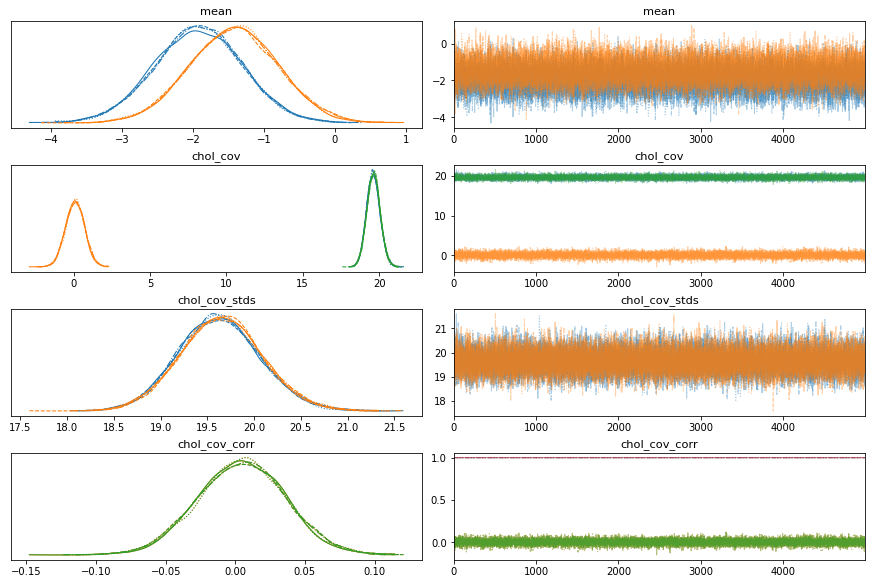

In [10]:
import arviz as az
az.plot_trace(trace)

In [11]:
trace.report.log_marginal_likelihood

array([-8816.19823889, -8816.33636167, -8816.20671467, -8816.31552116])

In [ ]:

p = 0.5
nu_0, inv_lambda_0, mu_0, kappa_0 = (5, np.eye(2), np.array([0, -2]), 10)

with pm.Model() as model:
    #comp = pm.Bernoulli("comp", p)

    sd_dist = pm.Exponential.dist(1.0, shape=2)
    chol, corr, stds = pm.LKJCholeskyCov('chol_cov', n=2, eta=2,
            sd_dist=sd_dist, compute_corr=True)
    mean = pm.MvNormal('mean', mu = mu_0,  chol=chol / np.sqrt(kappa_0), shape=2)
    vals = pm.MvNormal('vals', mu=mean, chol = chol, observed=dat)
    
    trace = pm.sample_smc(1000, random_seed=42, parallel=True)

In [12]:
model = pm.Model()
k = 2
ndata = dat.shape[0]
nu_0, inv_lambda_0, mu_0, kappa_0 = (5, np.eye(2), np.array([0, -3]), 1)
nu_1, inv_lambda_1, mu_1, kappa_1 = (5, np.eye(2), np.array([-3, 0]), 1)
with model:
    # cluster sizes
    #p = pm.Dirichlet("p", a=np.array([1.0, 1.0]), shape=k)
    # ensure all clusters have some points
    #p_min_potential = pm.Potential("p_min_potential", tt.switch(tt.min(p) < 0.1, -np.inf, 0))

    # cluster centers
    means_1 = pm.Normal("means_comp_1", mu=mu_0, sigma=np.array([5, 5]), shape=2)
    means_2 = pm.Normal("means_comp_2", mu=mu_1, sigma=np.array([5, 5]), shape=2)
    #means 
    #break symmetry
#     order_means_potential = pm.Potential(
#         "order_means_potential",
#         tt.switch(means[1] - means[0] < 0, -np.inf, 0)
#     )

    # measurement error
    sd_dist1 = pm.Exponential.dist(0.25, shape=2)
    sd_dist2 = pm.Exponential.dist(1.0, shape=2)
    chol1, corr1, stds1 = pm.LKJCholeskyCov('chol_cov_1', n=2, eta=2,
            sd_dist=sd_dist1, compute_corr=True)
    chol2, corr2, stds2 = pm.LKJCholeskyCov('chol_cov_2', n=2, eta=2,
            sd_dist=sd_dist2, compute_corr=True)
    
    comp1 = pm.MvNormal.dist(mu = means_1, chol=chol1)
    comp2 = pm.MvNormal.dist(mu=means_2, chol = chol2)

    # latent cluster of each observation
    #category = pm.Categorical("category", p=p, shape=ndata)

    # likelihood for each observed value
    #points = pm.Normal("obs", mu=means[category], sigma=sd, observed=dat)
    likelihood = pm.Mixture(name = "lh", w = [0.5, 0.5], comp_dists = [comp1,comp2], observed=dat)
    
    trace = pm.sample_smc(1000, random_seed=1, parallel=False)

Initializing SMC sampler...
Sampling 4 chains in 4 jobs
Stage:   0 Beta: 0.000
Stage:   1 Beta: 0.000
Stage:   2 Beta: 0.000
Stage:   3 Beta: 0.001
Stage:   4 Beta: 0.002
Stage:   5 Beta: 0.005
Stage:   6 Beta: 0.011
Stage:   7 Beta: 0.018
Stage:   8 Beta: 0.025
Stage:   9 Beta: 0.030
Stage:  10 Beta: 0.037
Stage:  11 Beta: 0.045
Stage:  12 Beta: 0.056
Stage:  13 Beta: 0.072
Stage:  14 Beta: 0.096
Stage:  15 Beta: 0.135
Stage:  16 Beta: 0.193
Stage:  17 Beta: 0.279
Stage:  18 Beta: 0.414
Stage:  19 Beta: 0.632
Stage:  20 Beta: 1.000
Stage:   0 Beta: 0.000
Stage:   1 Beta: 0.000
Stage:   2 Beta: 0.000
Stage:   3 Beta: 0.001
Stage:   4 Beta: 0.002
Stage:   5 Beta: 0.005
Stage:   6 Beta: 0.010
Stage:   7 Beta: 0.017
Stage:   8 Beta: 0.024
Stage:   9 Beta: 0.030
Stage:  10 Beta: 0.036
Stage:  11 Beta: 0.043
Stage:  12 Beta: 0.054
Stage:  13 Beta: 0.070
Stage:  14 Beta: 0.092
Stage:  15 Beta: 0.126
Stage:  16 Beta: 0.176
Stage:  17 Beta: 0.257
Stage:  18 Beta: 0.380
Stage:  19 Beta: 0.578
S

In [13]:
trace.report.log_marginal_likelihood

array([-8845.86686715, -8846.43671328, -8846.02957658, -8845.65642377])

In [1]:
"robust_layer_5_submodule_1_batch0_features.npy".replace("robust_layer_5_submodule", "")

'_1_batch0_features.npy'